In [ ]:
# Vector as a list of Floats

from typing import List
Vector = List[float]

height_weight_age = [70,  # inches
                     170, # pounds
                     40]  # years

grades = [95, # exam1
          80, # exam2
          75, # exam3
          62] # exam4

- Vectors add `componentwise`

In [ ]:
def add(v: Vector, w: Vector) -> Vector:
  """Adds corresponding elements"""

  assert len(v) == len(w), "vectors must be of the same length"

  return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [ ]:
def subtract(v: Vector, w: Vector) -> Vector:
  """Subtracts corresonding elements"""

  assert len(v) == len(w), "vectors must be of the same length"

  return [v_i - w_i for v_i, w_i in zip(v,w)]

assert subtract([5,7,9], [4,5,6]) == [1,2,3]

In [ ]:
# componentwise summation of list of vectors

def vector_sum(vectors: List[Vector]) -> Vector:
  """Sums all corresponding elements"""

  # check that vectors are not blank
  assert vectors, "no vectors provided!"

  # check the vectors are all the same size
  num_elements = len(vectors[0])
  assert all(len(v) == num_elements for v in vectors), "different sizes"

  # the i-th element of the result is the sum of every vector[i]
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

assert vector_sum([[1,2], [3,4], [5,6], [7,8]]) == [16, 20]

In [ ]:
# multiplying vector elements by a scalar

def scalar_multiply(c: float, v: Vector) -> Vector:
  """Multiplies every element by c"""
  return [c * v_i for v_i in v]

assert scalar_multiply(2, [1,2,3]) == [2,4,6]

In [ ]:
# Componentwise means of list of vectors

def vector_mean(vectors: List[Vector]) -> Vector:
  """Computes the element-wise average"""

  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1,2], [3,4], [5,6]]) == [3,4]

**Dot Product**
> of 2 vectors is the sum of their componentwise products.



In [ ]:
def dot(v: Vector, w: Vector) -> float:
  """Computes v_1 * w_1 + ... + v_n * w_n"""

  assert len(v) == len(w), "vectors must be of the same length"

  return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1,2,3], [4,5,6]) == 32

`dot(v,w)` - the length of the vector you'd get if v is _projected_ onto w.

In [ ]:
def sum_of_squares(v: Vector) -> float:
  """Returns v_1 * v_1 + ... + v_n * v_n"""
  return dot(v,v)

assert sum_of_squares([1,2,3]) == 14

In [ ]:
# to get magnitude of a vector
import math
def magnitude(v: Vector)-> float:
  """Returns the magnitude (or length) of v"""
  return math.sqrt(sum_of_squares(v))

assert magnitude([3,4]) == 5

In [ ]:
def squared_distance(v: Vector, w: Vector) -> float:
  """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
  return sum_of_squares(subtract(v, w))

def distance_1(v: Vector, w: Vector) -> float:
  """Computes the distance between v and w"""
  return math.sqrt(squared_distance(v, w))

# OR we can only write (and both can equallty work)

def distance_2(v: Vector, w: Vector) -> float:
  return magnitude(subtract(v, w))

# Matrices

In [ ]:
# Another type alias
Matrix = List[List[float]]

A = [[1,2,3], [4,5,6]] # A has 2 rows and 3 columns
B = [[1,2], [3,4], [5,6]]

In [ ]:
# to get the shape (dimensions) of the matrix.

from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
  """Returns (# of rows of A, # of columns of A)"""

  num_rows = len(A)
  num_cols = len(A[0]) if A else 0 # number of elements in first row
  return num_rows, num_cols

assert shape([[1,2,3], [4,5,6]]) == (2,3) # 2 rows, 3 columns

In [ ]:
def get_row(A: Matrix, i: int) -> Vector:
  """Returns the i-th row of A (as a vector)"""
  return A[i]

def get_columns(A: Matrix, j: int) -> Vector:
  """Returns the j-th column of A (as a vector)"""
  return [A_i[j] for A_i in A]

In [ ]:
from typing import Callable

def make_matrix(num_rows: int, num_cols: int, entry_fn: Callable[[int, int], float]) -> Matrix:
  """Returns a num_rows X num_cols matrix whose (i, j)-th entry is entry_fn(i, j)"""
  return [[entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

In [ ]:
def identity_matrix(n: int) -> Matrix:
  """Returns the n X n identity matrix"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [ ]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

# can be represented as 

friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],  # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],  # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],  # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]  # user 9

In [ ]:
assert friend_matrix[0][2] == 1
assert friend_matrix[0][8] == 0

In [29]:
friends_of_six = [i for i, is_friend in enumerate(friend_matrix[5]) if is_friend]
friends_of_six

[4, 6, 7]

### Creating a Network graph for visualization

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

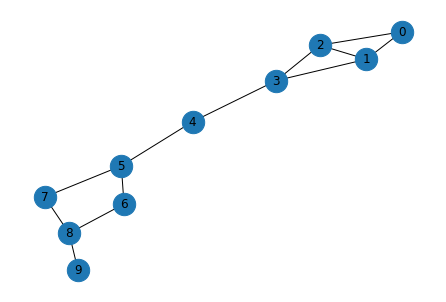

In [48]:
show_graph_with_labels(adjacency_matrix=np.array(friend_matrix))